# Loan Application Status Prediction

In [154]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [155]:
#Import data file
df=pd.read_csv("loan_application_status_dataset.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


# Problem Definition

# Data Analysis

In [156]:
#Check null values
df.isnull().sum()
#Feature: Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History have null values.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [157]:
#Check the feature datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [158]:
#Check target variables
print(df["Loan_Status"].unique())
print(df["Loan_Status"].nunique())

['Y' 'N']
2


In [159]:
#Check data imbalance
df["Loan_Status"].value_counts()
# There is a data imbalance

Y    422
N    192
Name: Loan_Status, dtype: int64

In [160]:
#Check the numerical features
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [161]:
#Check correlation
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [162]:
#Check skewness in the numeric data
df.skew()
#All the numeric data have skewness

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [163]:
#Check the categorical features
#1.Loan_ID
print(df["Loan_ID"].unique())
print(df["Loan_ID"].nunique())

['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289' 'LP001

In [164]:
#2.Gender
print(df["Gender"].unique())
print(df["Gender"].nunique())
#NaN values can be replaced by mode

['Male' 'Female' nan]
2


In [165]:
# 2.Married
print(df["Married"].unique())
print(df["Married"].nunique())
print(df["Married"].value_counts())

['No' 'Yes' nan]
2
Yes    398
No     213
Name: Married, dtype: int64


In [166]:
# 3.Dependents
print(df["Dependents"].unique())
print(df["Dependents"].nunique())
print(df["Dependents"].value_counts())
#NaN values to be replaced by mode

['0' '1' '2' '3+' nan]
4
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [167]:
# 4.Education
print(df["Education"].unique())
print(df["Education"].nunique())
print(df["Education"].value_counts())

['Graduate' 'Not Graduate']
2
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


In [168]:
# 5.Self_Employed
print(df["Self_Employed"].unique())
print(df["Self_Employed"].nunique())
print(df["Self_Employed"].value_counts())
#NaN values to be replaced by mode

['No' 'Yes' nan]
2
No     500
Yes     82
Name: Self_Employed, dtype: int64


In [169]:
# 6.Property_Area
print(df["Property_Area"].unique())
print(df["Property_Area"].nunique())
print(df["Property_Area"].value_counts())

['Urban' 'Rural' 'Semiurban']
3
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [170]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [171]:
#Check loan status of people with & without credit history.
pd.crosstab(df["Credit_History"],df["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


# EDA

<AxesSubplot:>

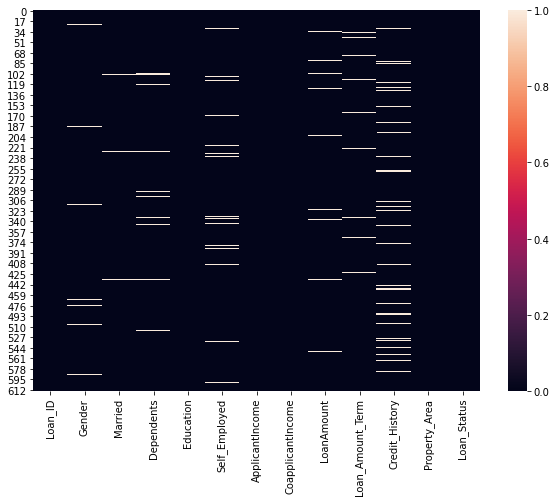

In [172]:
#Univariate Analysis
#Check for null values
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

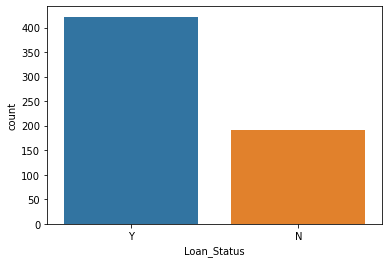

In [173]:
#Check target variables
sns.countplot(x="Loan_Status",data=df)

<AxesSubplot:>

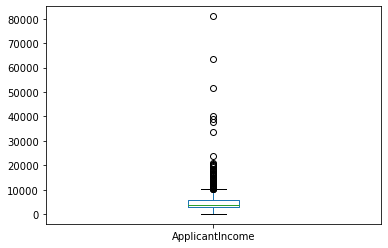

In [174]:
#Check for outliers in numerical values
#1. Applicant income
df["ApplicantIncome"].plot.box()

<AxesSubplot:>

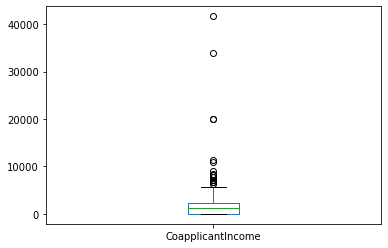

In [175]:
#2. CoapplicantIncome
df["CoapplicantIncome"].plot.box()

<AxesSubplot:>

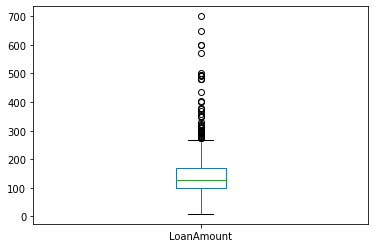

In [176]:
#3. Loan Amount
df["LoanAmount"].plot.box()

<AxesSubplot:>

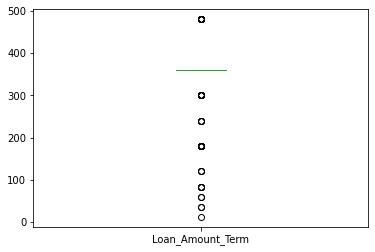

In [177]:
#4 Loan Amount Term
df["Loan_Amount_Term"].plot.box()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

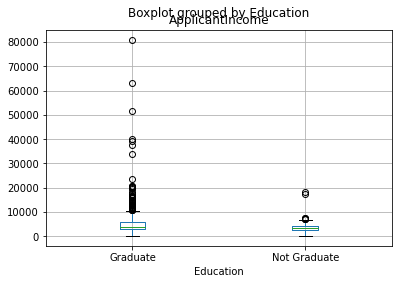

In [178]:
#Bi variate analysis
#Applicant income vs variable education
df.boxplot(column="ApplicantIncome",by="Education")

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

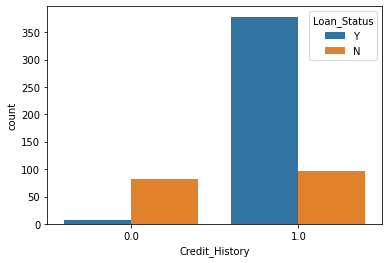

In [179]:
# Credit_history vs Loan_Status
sns.countplot(x="Credit_History",data=df,hue="Loan_Status")

# Pre-processing pipeline

In [180]:
#Check null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [181]:
#Impute missing values in "Categorical variables" by mode
#1.Gender
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)

#2.Married
df["Married"].fillna(df["Married"].mode()[0],inplace=True)

#3.Dependents
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)

#4. Self employeed
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)

In [182]:
#Impute missing values from numeric variables features
# Loan Amount
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)

# Loan_Amount_Term are fixed and not continous data. Hence replaced by mode
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)

# Credit_History is categorical , hence replaced by mode
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

In [183]:
#Check null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [184]:
#Combine Applicant income & Co applicant income into Total income
df["TotalIncome"]= df["ApplicantIncome"] + df["CoapplicantIncome"]
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [185]:
#Check skewness
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
TotalIncome          5.633449
dtype: float64

In [186]:
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.cbrt(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.cbrt(df[index])

In [187]:
#Check skewness
df.skew()

ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term    -3.578100
Credit_History      -2.021971
TotalIncome          2.130329
dtype: float64

In [189]:
#Feature "Loan_ID" is object datatype has 614 unique values & difficult to handle using pd.get_dummies,
#logically it wont contribute to the output, Hence we drop the column.
df.drop("Loan_ID",axis=1,inplace=True)

In [193]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,18.017473,0.000000,5.270588,7.113787,1.0,Urban,Y,18.017473
1,Male,Yes,1,Graduate,No,16.610522,11.467457,5.039684,7.113787,1.0,Rural,N,18.262611
2,Male,Yes,0,Graduate,Yes,14.422496,0.000000,4.041240,7.113787,1.0,Urban,Y,14.422496
3,Male,Yes,0,Not Graduate,No,13.720654,13.310098,4.932424,7.113787,1.0,Urban,Y,17.032234
4,Male,No,0,Graduate,No,18.171206,0.000000,5.204828,7.113787,1.0,Urban,Y,18.171206


In [191]:
#Convert the categorical values into numeric
df_new=pd.get_dummies(df,drop_first=True)
df_new.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,18.017473,0.000000,5.270588,7.113787,1.0,18.017473,1,0,0,0,0,0,0,0,1,1
1,16.610522,11.467457,5.039684,7.113787,1.0,18.262611,1,1,1,0,0,0,0,0,0,0
2,14.422496,0.000000,4.041240,7.113787,1.0,14.422496,1,1,0,0,0,0,1,0,1,1
3,13.720654,13.310098,4.932424,7.113787,1.0,17.032234,1,1,0,0,0,1,0,0,1,1
4,18.171206,0.000000,5.204828,7.113787,1.0,18.171206,1,0,0,0,0,0,0,0,1,1


In [192]:
df_new.shape

(614, 16)

In [194]:
#Split data into dependent & independent variables
df_x=df_new.drop(columns=["Loan_Status_Y"])
y=df_new["Loan_Status_Y"]
print(df_x.shape,y.shape)

(614, 15) (614,)


In [195]:
y.value_counts()

1    422
0    192
Name: Loan_Status_Y, dtype: int64

 # Building Machine Learning Models

In [200]:
#Lets use f1-score,confusion matrix,classification report & AUC_ROC as metrics 
from sklearn.metrics import f1_score,classification_report,confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
def maxf1_score(clf,x,y):
    maxf1=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        if tmp>maxf1:
            maxf1=tmp
            rs=r_state
    print("Maximum f1_score is at random state :",rs," and it is :",maxf1)
    print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
    print("Classification report \n",classification_report(y_test,y_pred))
    
    #AUC-ROC Curve-Logistic regression
    lg_disp = plot_roc_curve(clf,x_test,y_test)
    plt.title("ROC")
    plt.show()

In [197]:
#User defined function for cross-validation
from sklearn.model_selection import cross_val_score
def cross_val(model,x,y):
    cv=cross_val_score(model,x,y,cv=5,scoring="f1")
    print("Mean f1 score for classifier: ",cv.mean())
    print(cv)

# 1.Logistic Regression

Maximum f1_score is at random state : 42  and it is : 0.9081081081081082
Confusion matrix 
 [[21 17]
 [ 2 83]]
Classification report 
               precision    recall  f1-score   support

           0       0.91      0.55      0.69        38
           1       0.83      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.87      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123



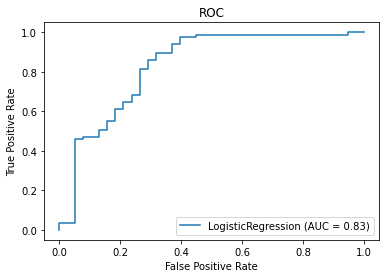

In [201]:
#Logistics Regression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
maxf1_score(lg,df_x,y)

In [199]:
#Cross validation of Logistic regression
cross_val(lg,df_x,y)

Mean f1 score for classifier:  0.8766952317357394
[0.87958115 0.86010363 0.85863874 0.90217391 0.88297872]


# 2. Decision Tree Classifier

In [203]:
#Hyper parameter tuning 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_clf=DecisionTreeClassifier()
clf = GridSearchCV(dt_clf, parameters, cv=5)
clf.fit(df_x,y)
clf.best_params_

{'criterion': 'gini', 'max_depth': 4}

Maximum f1_score is at random state : 42  and it is : 0.9021739130434783
Confusion matrix 
 [[20 18]
 [ 2 83]]
Classification report 
               precision    recall  f1-score   support

           0       0.91      0.53      0.67        38
           1       0.82      0.98      0.89        85

    accuracy                           0.84       123
   macro avg       0.87      0.75      0.78       123
weighted avg       0.85      0.84      0.82       123



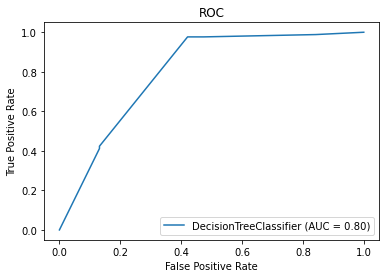

In [204]:
#Decision tree Classifier
dt=DecisionTreeClassifier(criterion="gini",max_depth=4)
maxf1_score(dt,df_x,y)

In [205]:
#Cross validation (Decision Tree Classifier)
cross_val(dt,df_x,y)

Mean f1 score for classifier:  0.8675650998184388
[0.86021505 0.84974093 0.85863874 0.89010989 0.87912088]


# 3.K-Nearest Neighbor Classifier

In [207]:
#For KNN we need to know the best value of k using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="f1")
clf.fit(df_x,y)
clf.best_params_

{'n_neighbors': 29}

Maximum f1_score is at random state : 47  and it is : 0.8252427184466019
Confusion matrix 
 [[ 4 34]
 [ 2 83]]
Classification report 
               precision    recall  f1-score   support

           0       0.67      0.11      0.18        38
           1       0.71      0.98      0.82        85

    accuracy                           0.71       123
   macro avg       0.69      0.54      0.50       123
weighted avg       0.70      0.71      0.62       123



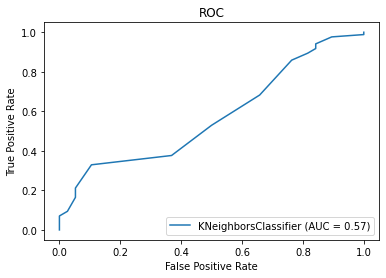

In [208]:
#KNN Classifier
knc=KNeighborsClassifier(n_neighbors=29)
maxf1_score(knc,df_x,y)

In [210]:
#Cross validation (KNN)
cross_val(knc,df_x,y)

Mean f1 score for classifier:  0.8170408219116123
[0.82125604 0.81730769 0.8195122  0.8115942  0.81553398]


# 4.Random Forest Classifier

In [213]:
#Hyper parameter tuning 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5)
clf.fit(df_x,y)
clf.best_params_

{'n_estimators': 100}

Maximum f1_score is at random state : 42  and it is : 0.903954802259887
Confusion matrix 
 [[22 16]
 [ 4 81]]
Classification report 
               precision    recall  f1-score   support

           0       0.85      0.58      0.69        38
           1       0.84      0.95      0.89        85

    accuracy                           0.84       123
   macro avg       0.84      0.77      0.79       123
weighted avg       0.84      0.84      0.83       123



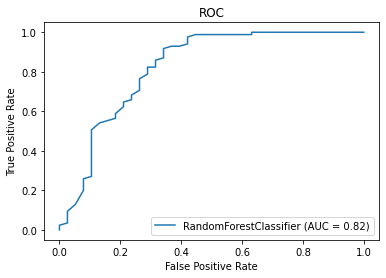

In [214]:
#Random forest classifier
rf_clf=RandomForestClassifier(n_estimators=100)
maxf1_score(rf_clf,df_x,y)

In [215]:
#Cross validation (Random Forest Classifier)
cross_val(rf_clf,df_x,y)

Mean f1 score for classifier:  0.8645046134774489
[0.85555556 0.85263158 0.86021505 0.875      0.87912088]


In [216]:
#Result
result=pd.DataFrame({"Classifier Model":["Logistic Regression","Decision Tree","K-Nearest Neighbour",
                                         "Random Forest"],
                     "Random State":[42,42,47,42],
                     "F1":[0.9081,0.9021,0.8252,0.9039],
                    "Cross Validation":[0.8766,0.8675,0.8170,0.8645],
                    "AUC":[0.83,0.80,0.57,0.82]})
result["Difference"]=result["F1"]-result["Cross Validation"]
result

,Classifier Model,Random State,F1,Cross Validation,AUC,Difference
0,Logistic Regression,42,0.9081,0.8766,0.83,0.0315
1,Decision Tree,42,0.9021,0.8675,0.80,0.0346
2,K-Nearest Neighbour,47,0.8252,0.8170,0.57,0.0082
3,Random Forest,42,0.9039,0.8645,0.82,0.0394


In [ ]:
#Conclusion: Logistic Regression has better F1 score and AUC. Hence we will save the Logistic Regression as final model

f1_score : 0.9081081081081082
Confusion matrix 
 [[22 16]
 [ 1 84]]
Classification report 
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



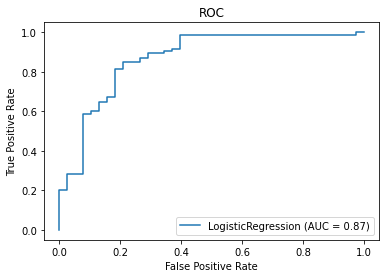

In [218]:
#Logistic regression
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(df_x, y,random_state = 42,test_size=0.20,stratify=y)
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
f1=f1_score(y_test,y_pred)
print("f1_score :",f1)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("Classification report \n",classification_report(y_test,y_pred))
    
#AUC-ROC Curve-Logistic regression
lg_disp = plot_roc_curve(lg,x_test,y_test)
plt.title("ROC")
plt.show()

In [220]:
#Saving the best model
import joblib
joblib.dump(lg,'Loan_Application_Status_Classifier.joblib')

['Loan_Application_Status_Classifier.joblib']